In [1]:
# Decision Tree and Rando Forest Project

In [2]:
# Import the usual libraries for pandas and plotting. You can import sklearn later on

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
%matplotlib inline

In [6]:
# Get the Data

In [7]:
# Usepandas to read loan_data.csv as a data frame called loans.

In [8]:
loans=pd.read_csv('loan_data.csv')

In [9]:
# Check out the info(),head(),and describe() methods on loans.

In [10]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [12]:
loans.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0


In [13]:
# Exploratory Data Analysis

In [14]:
# Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome

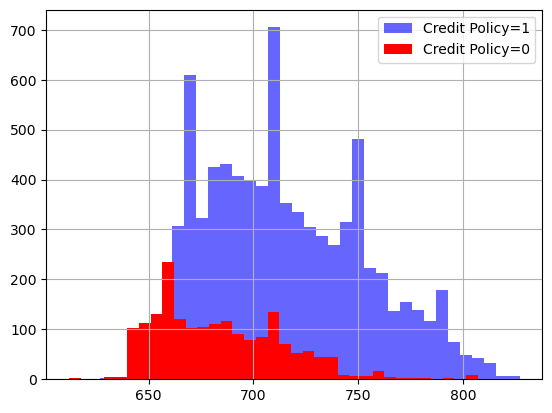

In [15]:
loans[loans['credit.policy']==1]['fico'].hist(bins=35,color='blue',
                                             label='Credit Policy=1',
                                             alpha=0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=35,color='red',
                                              label='Credit Policy=0')
plt.legend()

In [16]:
# Create a similar figure, except this time select by the not.fully.paid columns.

Text(0.5, 0, 'FICO')

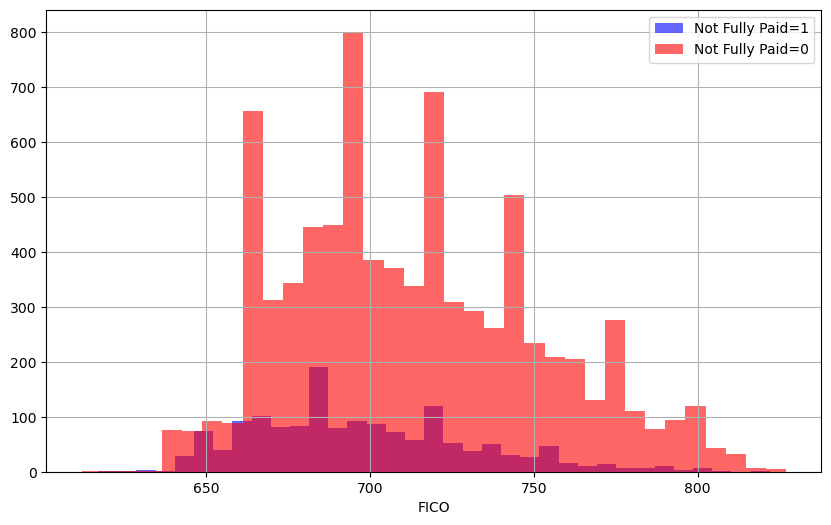

In [17]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35,color='blue',
                                              label='Not Fully Paid=1',
                                              alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35,color='red',
                                              label='Not Fully Paid=0',
                                              alpha=0.6)
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

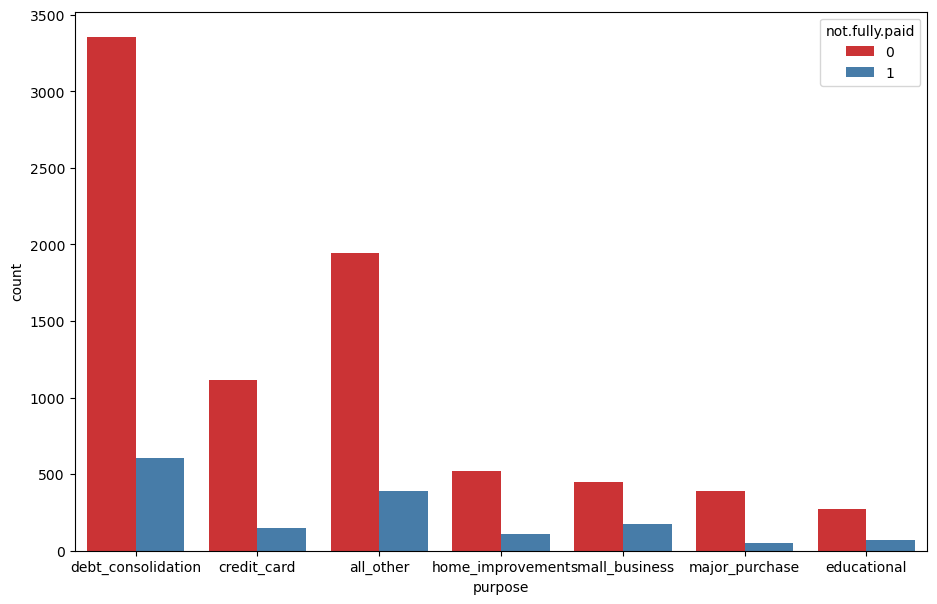

In [18]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

In [19]:
# Let's see the trend between FICo score and interesr rate. Recreate the following jointplot.

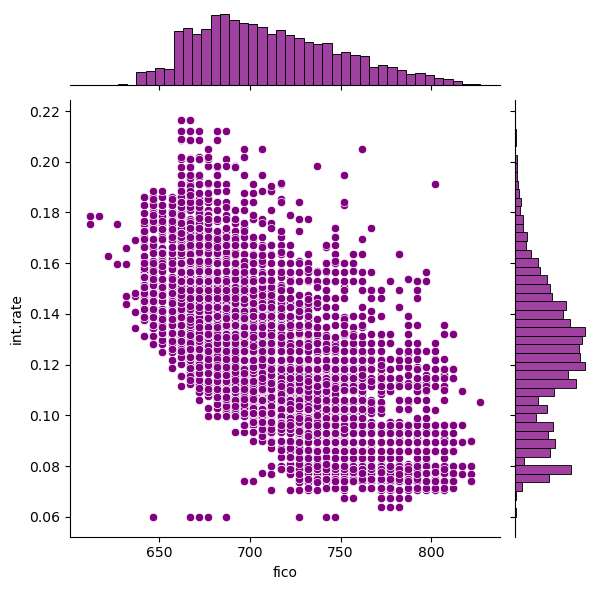

In [20]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

In [21]:
# Create the following implots to see if the trend differed between not.fully.paid and credit.policy.
# Check the documentation for implots() if you can not figure out how to seperate it into columns

C:\Users\filda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1100x700 with 0 Axes>

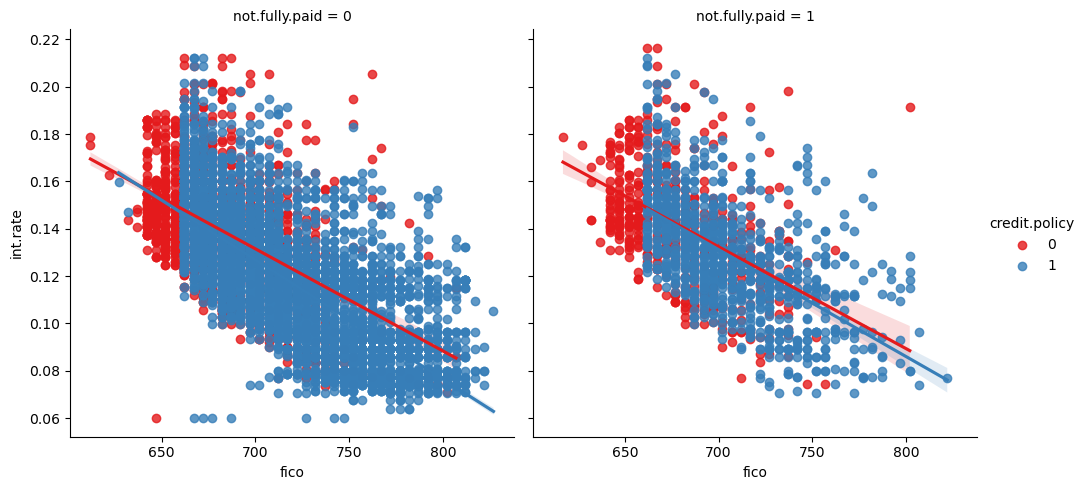

In [22]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [23]:
# Setting up the Data

In [24]:
# Let's get ready to set up our data for our Random Forest Classification Model!
# Check loans.info() again.

In [25]:
# Part 2

In [26]:
# Categorical Features

In [27]:
# Create a list of 1 element containing the spring 'purpose'. Call this cat_feats. 

In [29]:
cat_feats=['purpose']

In [28]:
# Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger
# dataframe that has new featurecolumns with dummy variables. Set this dataframe as final_data.

In [31]:
final_data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [ ]:
# Train Test Split

In [32]:
# use sklearn to split your data into a training set and a testing set as we have done in the past.

In [35]:
# from sklearn.cross_validation import train_test_split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
 train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [48]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.3, random_state=101)

In [49]:
# Training a Decision Tree Model

In [50]:
# Let's start by training a single decision tree first!

In [51]:
# Import DecisionTreeClassifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
# Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [54]:
dtree=DecisionTreeClassifier()

In [55]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
# Predictions and Evaluation of Decision Tree

In [57]:
# Create predictions from the test set and create a classification report
# and a confusion matrix.

In [59]:
predictions=dtree.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2431
           1       0.20      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [66]:
print(confusion_matrix(y_test,predictions))

[[2007  424]
 [ 340  103]]


In [67]:
# Training the Random Forest model

In [68]:
# Create an instance of the RandomForestClassifier class and fit it to our 
# trainingdata from the previous step.

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc=RandomForestClassifier(n_estimators=300)

In [73]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [74]:
# Predictions and Evaluation

In [ ]:
# Let's predict off the y_test values and evaluate our model

In [75]:
# Predict the class of not.fully.paid for the X_test data.

In [77]:
predictions=rfc.predict(X_test)

In [78]:
# Now create a classification report from the results. Do you
# get anything strange or some sort of warming?

In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [80]:
# Show the Confusion Matrix for the predictions

In [81]:
print(confusion_matrix(y_test,predictions))

[[2421   10]
 [ 433   10]]


In [82]:
# what performed better the randomforest or the decision tree?

In [83]:
# Randomforest did better with the exception of some spots. You need 
# some experience in order to figure it out